In [2]:
import pandas as pd
import altair as alt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [31]:
sample_size = 20

In [32]:
humanist_vols = pd.read_csv("web_scraped_humanist_listserv_volumes.csv")

In [4]:
humanist_vols = humanist_vols.sample(10)

In [5]:
humanist_vols['volume_number'] = humanist_vols['volume_dates'].str.extract(r'(\d+)')

In [6]:
docs2k = humanist_vols.loc[humanist_vols['inferred_start_year'] > 1999]
docs19 = humanist_vols.loc[humanist_vols['inferred_start_year'] < 2000]

In [33]:
vectorizer = TfidfVectorizer(max_df=.7, min_df=1)

dates = humanist_vols.inferred_start_year.tolist()
both_sections = []
for s in [docs19, docs2k]:
    documents = s.volume_text.tolist()
    tfidf_results = []
    for counter, doc in enumerate(vectorizer.fit_transform(documents).toarray()
    ):
        tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), doc))
        one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
        one_doc_as_df['inferred_start_year'] = dates[counter]
        tfidf_results.append(one_doc_as_df)
        p = pd.concat(tfidf_results).sort_values('score',ascending=False).head(sample_size)
    both_sections.append(p)
        

<Axes: title={'center': 'most common terms in post-99 humanist'}, ylabel='term'>

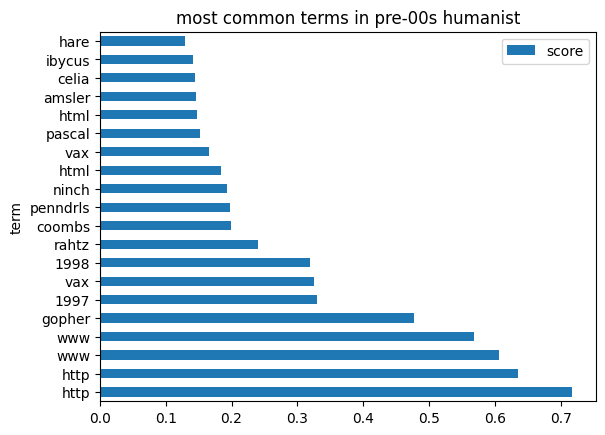

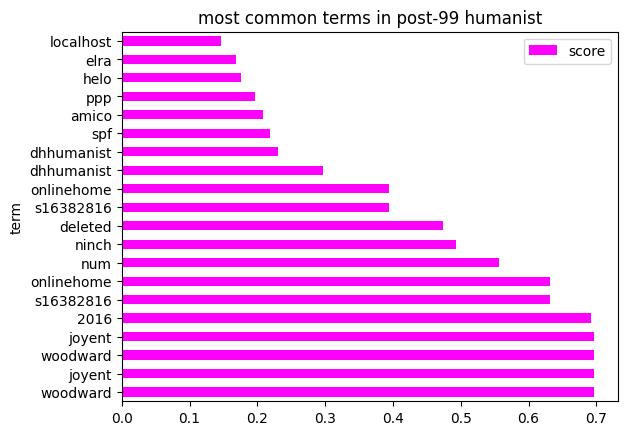

In [35]:
t="most common terms in pre-00s humanist"
t2="most common terms in post-99 humanist"

ax = both_sections[0].plot(x='term', y="score", kind="barh", title=t)
both_sections[1].plot(x='term', y='score', kind='barh', color="#ff00ff", title=t2)


In [9]:
both_sections[1].head()

,term,score,inferred_start_year
0,2016,0.691907,1999
1,onlinehome,0.393905,1999
2,s16382816,0.393905,1999
3,dhhumanist,0.296308,1999
4,ppp,0.196953,1999
